In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 32.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is

In [3]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [4]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [5]:
path = untar_data(URLs.IMDB)
dls = DataBlock(
    blocks=(TextBlock.from_folder(path),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [8]:
files = get_text_files(path, folders = ['train', 'test'])
txts = L(o.open().read() for o in files[:2000])
print(txts[0])
print(txts[0][:20])
print(txts[1])

This is the best television series for children (and adults) ever. John Hurt is a great actor, with many excellent performances over many years, but he was born to play the storyteller. The scripts for almost every episode are superb pieces of craftsmanship, and the productions run the gamut of the emotions, being alternately funny, sad, happy, exciting, and always hauntingly beautiful. It is hard to pick a best episode from so many excellent contenders, but "The Soldier and Death", with its timeless pathos, is unbeatable. It is a series to watch with your children, over and over again.
This is the best tel
I love the Thackeray novel on which this film is based. And while this modern version of Becky Sharp's story is a B film, the casting of Loy, in her first top-billed role, is rather fascinating.<br /><br />Before Loy became MGM's reigning good girl in scores of genteel and comic roles, she was an actress. VANITY FAIR was Loy's follow-up film to EMMA, in which she played a snotty and

In [9]:
tok = Tokenizer.from_folder(path)
tok.setup(txts)
toks = txts.map(tok)
toks[0]

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


(#129) ['xxbos','xxmaj','this','is','the','best','television','series','for','children'...]

In [10]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([  2,   8,  20,  16,   9, 110, 693, 181,  29, 415])

In [11]:
nums_dec = num.decode(nums[0][:10]); nums_dec

(#10) ['xxbos','xxmaj','this','is','the','best','television','series','for','children']

In [12]:
tok.decode(nums_dec)

'xxbos xxmaj this is the best television series for children'

In [13]:
tok((txts[0], txts[1]))

((#129) ['xxbos','xxmaj','this','is','the','best','television','series','for','children'...],
 (#429) ['xxbos','i','love','the','xxmaj','thackeray','novel','on','which','this'...])

In [14]:
def f(x:int): return x+1
tfm = Transform(f)
tfm(2),tfm(2.0)

(3, 2.0)

In [15]:
@Transform
def f(x:int): return x+1
f(3),f(3.0)

(4, 3.0)

In [16]:
class NormalizeMean(Transform):
    def setups(self, items): self.mean = sum(items)/len(items)
    def encodes(self, x): return x-self.mean
    def decodes(self, x): return x+self.mean

In [17]:
tfm = NormalizeMean()
tfm.setup([1,2,3,4,5])
start = 2
y = tfm(start)
z = tfm.decode(y)
tfm.mean,y,z

(3.0, -1.0, 2.0)

In [18]:
tfms = Pipeline([tok, num])
t = tfms(txts[0]); t[:20]

TensorText([   2,    8,   20,   16,    9,  110,  693,  181,   29,  415,   35,   12, 1234,   33,  144,   11,    8,  286,    8, 1170])

In [19]:
tfms.decode(t)[:100]

'xxbos xxmaj this is the best television series for children ( and adults ) ever . xxmaj john xxmaj h'

In [20]:
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize])

In [21]:
t = tls[0]; t[:20]

TensorText([   2,    8,   20,   16,    9,  140,  724,  227,   29,  439,   37,   12, 1571,   34,  145,   10,    8,  320,    8, 1519])

In [24]:
tls.decode(t)[:100]

'xxbos xxmaj this is the best television series for children ( and adults ) ever . xxmaj john xxmaj h'

In [25]:
tls.show(t)

xxbos xxmaj this is the best television series for children ( and adults ) ever . xxmaj john xxmaj hurt is a great actor , with many excellent performances over many years , but he was born to play the storyteller . xxmaj the scripts for almost every episode are superb pieces of craftsmanship , and the productions run the gamut of the emotions , being alternately funny , sad , happy , exciting , and always hauntingly beautiful . xxmaj it is hard to pick a best episode from so many excellent contenders , but " the xxmaj soldier and xxmaj death " , with its timeless pathos , is unbeatable . xxmaj it is a series to watch with your children , over and over again .


In [26]:
cut = int(len(files)*0.8)
splits = [list(range(cut)), list(range(cut,len(files)))]
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize],
                splits=splits)

In [27]:
tls.valid[0][:20]

TensorText([   2,    8,   33,   96,  159,   21,    9,  173,  106,  114,   13,   30,   11,   31,   20,  703, 1699,   21, 2523,  383])

In [28]:
lbls = files.map(parent_label)
lbls
print(lbls[0])

pos


In [29]:
cat = Categorize()
cat.setup(lbls)
cat.vocab, cat(lbls[0])

(['neg', 'pos'], TensorCategory(1))

In [30]:
tls_y = TfmdLists(files, [parent_label, Categorize()])
tls_y[0]

TensorCategory(1)

In [31]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms])
x,y = dsets[0]
x[:20],y

(TensorText([   2,    8,   20,   16,    9,  140,  724,  227,   29,  439,   37,   12, 1571,   34,  145,   10,    8,  320,    8, 1519]),
 TensorCategory(1))

In [32]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)
x,y = dsets.valid[0]
x[:20],y

(TensorText([   2,    8,   33,   96,  159,   21,    9,  173,  106,  114,   13,   30,   11,   31,   20,  703, 1699,   21, 2523,  383]),
 TensorCategory(0))

In [33]:
t = dsets.valid[0]
test=dsets.valid[1]
dsets.decode(test)
dsets.decode(t)

("xxbos xxmaj you could say that the actors will make a movie , but this clearly proves that statement wrong . xxmaj most of the characters in this film lack anything to hold on to . xxmaj they play the part of cardboard cut outs being moved about in predictable and uninteresting ways . xxmaj the story is very simple . xxmaj it could be summed up in a few words , but xxmaj i 'll hold back in case anyone reading does want to see this film . \n\n i had to fast forward the parts where xxmaj jack showed us how to be an obnoxious eater . xxmaj i 'd have to say that 70 % of this film revolved around cooking , eating , or getting ready to eat . xxmaj quite frankly , xxmaj i 'd rather not spend my time watching xxmaj jack chew xxunk with an open mouth . xxmaj personally , i could have done without the footwear references and jokes that pepper the first half of the film too . \n\n xxmaj outside of my own personal dementia , the film really lacked anything worth it 's time . xxmaj there were cou

In [34]:
dls = dsets.dataloaders(bs=64, before_batch=pad_input)

In [36]:
tfms = [[Tokenizer.from_folder(path), Numericalize], [parent_label, Categorize]]
files = get_text_files(path, folders = ['train', 'test'])
splits = GrandparentSplitter(valid_name='test')(files)
dsets = Datasets(files, tfms, splits=splits)
dls = dsets.dataloaders(dl_type=SortedDL, before_batch=pad_input)
print(dls)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [37]:
path = untar_data(URLs.IMDB)
dls = DataBlock(
    blocks=(TextBlock.from_folder(path),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)
print(dls)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


进行部分训练实战

In [38]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

In [39]:
class SiameseImage(fastuple):
    def show(self, ctx=None, **kwargs):
        img1,img2,same_breed = self
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2], dim=2),
                          title=same_breed, ctx=ctx)

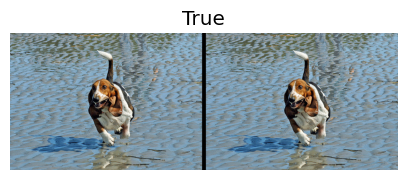

In [40]:
img = PILImage.create(files[0])
s = SiameseImage(img, img, True)
s.show();

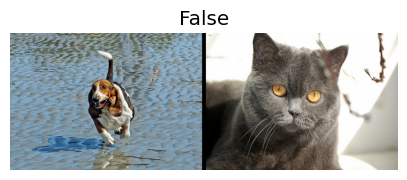

In [41]:
img1 = PILImage.create(files[1])
s1 = SiameseImage(img, img1, False)
s1.show();


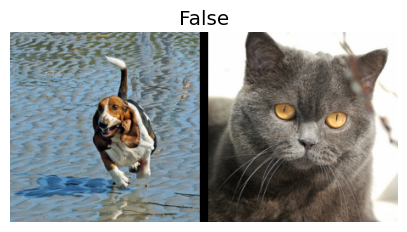

In [42]:
s2 = Resize(224)(s1)
s2.show();

In [43]:
def label_func(fname):
    return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]

In [44]:
class SiameseTransform(Transform):
    def __init__(self, files, label_func, splits):
        self.labels = files.map(label_func).unique()
        self.lbl2files = {l: L(f for f in files if label_func(f) == l)
                          for l in self.labels}
        self.label_func = label_func
        self.valid = {f: self._draw(f) for f in files[splits[1]]}

    def encodes(self, f):
        f2,t = self.valid.get(f, self._draw(f))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, t)

    def _draw(self, f):
        same = random.random() < 0.5
        cls = self.label_func(f)
        if not same:
            cls = random.choice(L(l for l in self.labels if l != cls))
        return random.choice(self.lbl2files[cls]),same

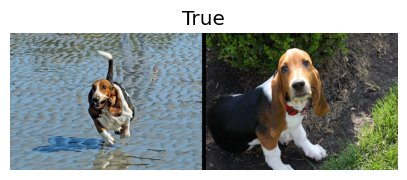

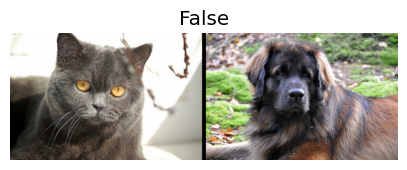

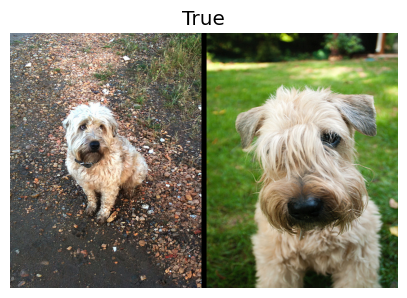

In [48]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, label_func, splits)
tfm(files[0]).show();
tfm(files[1]).show();
tfm(files[5]).show();

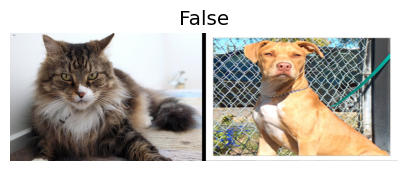

In [46]:
tls = TfmdLists(files, tfm, splits=splits)
show_at(tls.valid, 0);

In [47]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
    after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')